# Task 2

## General instructions

First, update the following cell to have a link to your Homework 1 GitHub repository

**UPDATE THIS LINK**
https://github.com/hazelvaq/eds220-hwk-2

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.


## About the data

In this task you will use [Air Quality Index (AQI)](https://www.airnow.gov/aqi/aqi-basics/) data from the [US Environmental Protection Agency](https://www.epa.gov) to visualize the impact on the AQI of the 2017 [Thomas Fire](https://en.wikipedia.org/wiki/Thomas_Fire) in Santa Barbara County. 

## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

<AxesSubplot:title={'center':'Daily AQI and 5-day average AQI for Santa Barbara'}, xlabel='Date', ylabel='PM2.5 (μm)'>

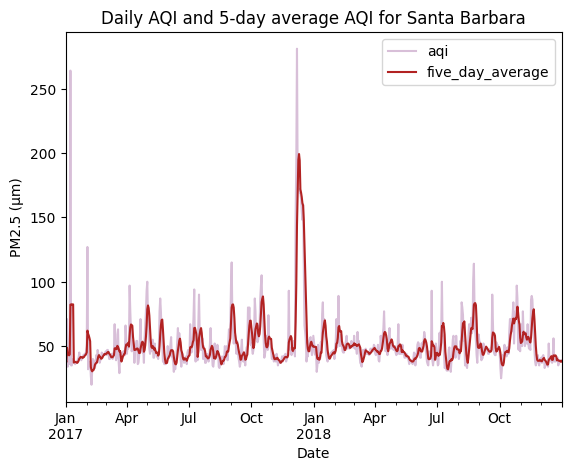

In [5]:
# read in pandas
import pandas as pd
# import matplotlib for colors
import matplotlib.pyplot as plt 

# read in 2017 Daily AQI by County data
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")

# read in 2018 Daily AQI by County data
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

# "Glue" aqi_17 and aqi_18
aqi = pd.concat([aqi_17,aqi_18])

# cleaning columns to be lowecase and replacing spaces with '_'
aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

# Select data only from Santa Barbara
aqi_sb = aqi[aqi.county_name == "Santa Barbara"]

# remove state_name, county_name, state_code and county_code columns
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name','state_code','county_code'])

# update date column to be datetime object
aqi_sb.date = pd.to_datetime(aqi_sb.date)

# aqi_sb index updated to date column
aqi_sb = aqi_sb.set_index("date")

# New column with mean of AQI over a 5-day rolling window
aqi_sb["five_day_average"] = aqi_sb.aqi.rolling("5D").mean()

# define colors for plot
colors = ['thistle','firebrick']

# line plot of daily AQI and the 5-day average 
aqi_sb.plot(y = ['aqi','five_day_average'], # setting y as AQI and 5-day average AQI
           xlabel = "Date", # x-axis label
           ylabel = "PM2.5 (μm)", #y-axis label
           title = "Daily AQI and 5-day average AQI for Santa Barbara", # title 
           color = colors) #setting colors for lines


## 1

1. Go to [EPA's website on Air Quality Data Collected at Outdoor Monitors Across the US](https://www.epa.gov/outdoor-air-quality-data). 
2. Under "Donwload Data" click on "Pre-generated Data Files"
3. Click on "Tables of Daily AQI"
4. Copy the URL to the 2017 Daily AQI **by County** zip file `daily_aqi_by_county_2017.zip`
5. In the next code cell read in the data from the URL using the `pd.read_csv` function and store it as `aqi_17`. 
6. In the same cell, read in the data for the 2018 Daily AQI by County zip file and store it as `aqi_18`.

In [1]:
# read in pandas
import pandas as pd

# read in 2017 Daily AQI by County data
aqi_17 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip")

# read in 2018 Daily AQI by County data
aqi_18 = pd.read_csv("https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip")

URLError: <urlopen error [Errno 101] Network is unreachable>

## 2 
(a) and (b) Use the next two cells to look at the head of both data frames.

(c) Use this cell to make some other preliminary data exploration of your choosing.

In [5]:
# (a) 2017 Daily AQI by County Head
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [6]:
# (b) 2018 AQI by County Head
aqi_18.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,15,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,19,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,25,Good,PM2.5,01-003-0010,1


In [7]:
# (c) 
# Average AQI for 2017 grouped by county
aqi_17.groupby('county Name').AQI.mean()

# Average AQI for 2018 grouped by county
aqi_18.groupby('county Name').AQI.mean()


county Name
Ada            44.082192
Adair          39.627397
Adams          35.916767
Adjuntas       15.333333
Aiken          42.709091
                 ...    
Yavapai        45.104110
Yellowstone    33.063768
Yolo           49.276712
York           40.379493
Yuma           51.413699
Name: AQI, Length: 793, dtype: float64

## 3
We currently have two separate dataframes. For this exercise we will need to "glue" them one on top of the other. The pandas function `pd.concat()` can achieve this. 

Pass `[aqi_17, aqi_18]` as the input of `pd.concat()` and store the output as  `aqi`.  
In the next line run `aqi`.

👀 NOTE: When we concatenate like this, without any extra parameters for `pd.concat()` the indices for the two dataframes are just "glued together", the index of the resulting dataframe is not updated to start from 0. Notice the index of `aqi` ends in 327536 while it has 654338 rows.


In [8]:
# "Glue" aqi_17 and aqi_18
aqi = pd.concat([aqi_17,aqi_18])
# print aqi
aqi

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1
...,...,...,...,...,...,...,...,...,...,...
327532,Wyoming,Weston,56,45,2018-12-27,36,Good,Ozone,56-045-0003,1
327533,Wyoming,Weston,56,45,2018-12-28,35,Good,Ozone,56-045-0003,1
327534,Wyoming,Weston,56,45,2018-12-29,35,Good,Ozone,56-045-0003,1
327535,Wyoming,Weston,56,45,2018-12-30,31,Good,Ozone,56-045-0003,1


## 4

Run the follwoing cell and read the comments to understand how the column names are being updated.

In [9]:
# initial column names: notice caps and spaces (difficult to work with!)
print(aqi.columns, '\n')

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()
print(aqi.columns, '\n')

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')
print(aqi.columns)


# as a "one liner" you could achieve this column name cleaning like this:
# aqi.columns = aqi.columns.str.lower().str.replace(' ','_')

Index(['State Name', 'county Name', 'State Code', 'County Code', 'Date', 'AQI',
       'Category', 'Defining Parameter', 'Defining Site',
       'Number of Sites Reporting'],
      dtype='object') 

Index(['state name', 'county name', 'state code', 'county code', 'date', 'aqi',
       'category', 'defining parameter', 'defining site',
       'number of sites reporting'],
      dtype='object') 

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')


## 5 
In the next cell:
- Select only data from `Santa Barbara` county and store in a new variable `aqi_sb`.
- Remove the `state_name`, `county_name`, `state_code` and `county_code` columns from `aqi_sb`. 
- Use the `dtypes` attribute to check the data types of the columns. What do you notice for the date column?

In [10]:
# Select data only from Santa Barbara
aqi_sb = aqi[aqi.county_name == "Santa Barbara"]

# remove state_name, county_name, state_code and county_code columns
aqi_sb = aqi_sb.drop(columns = ['state_name','county_name','state_code','county_code'])

# check data types of columns
aqi_sb.dtypes # the date is an object

date                         object
aqi                           int64
category                     object
defining_parameter           object
defining_site                object
number_of_sites_reporting     int64
dtype: object

## 6
In the next cell:
1. Update the date column of `aqi_sb` to be a datetime object.
2. Update the index of `aqi_sb` to be the date column.

In [11]:
# update date column to be datetime object
aqi_sb.date = pd.to_datetime(aqi_sb.date)
# check column update
aqi_sb.dtypes

# aqi_sb index updated to date column
aqi_sb = aqi_sb.set_index("date")

## 7
In the next cell, check that you've updated the index by accessing the index of `aqi_sb`  by running `aqi_sb.index`. Add in a comment what is the data type (dtype) of the index.

In [14]:
# Checking if index has been updated to date 
aqi_sb.index # data type is datetime64


DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

## 8
Run the next cell and read through the comments. They will explain how to do make an average over a rolling window.

- We can createCreate a new variable `five_day_average` with the mean of the AQI over a 5-day rolling window. To do this use the `rolling`
- 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rolling.html


In [17]:
# rolling() is a method for pandas.series that provides rolling window calculations
# the parameter '5D' indicates we want the window to be 5 days
# This is a lazy method (think groupby), we need to specify what we want to calculate over each window
# here we add the aggregator function mean()
# this indicates we want the mean over each window
# and we get a pd.Series as ouput
aqi_sb.aqi.rolling('5D').mean()

date
2017-01-01    39.000000
2017-01-02    37.500000
2017-01-03    48.666667
2017-01-04    45.000000
2017-01-05    43.400000
                ...    
2018-12-27    38.600000
2018-12-28    38.600000
2018-12-29    38.200000
2018-12-30    37.800000
2018-12-31    38.400000
Name: aqi, Length: 730, dtype: float64

## 9 

Without creating any new variables, add the mean of the AQI over a 5-day rolling window as a new column named 'five_day_average' to the `aqi_sb` dataframe. 

In [22]:
# New column with mean of AQI over a 5-day rolling window
aqi_sb["five_day_average"] = aqi_sb.aqi.rolling("5D").mean()

# display table
aqi_sb


,aqi,category,defining_parameter,defining_site,number_of_sites_reporting,five_day_average
date,,,,,,
2017-01-01,39,Good,Ozone,06-083-4003,12,39.000000
2017-01-02,36,Good,Ozone,06-083-4003,11,37.500000
2017-01-03,71,Moderate,PM10,06-083-4003,12,48.666667
2017-01-04,34,Good,Ozone,06-083-4003,13,45.000000
2017-01-05,37,Good,Ozone,06-083-4003,12,43.400000
...,...,...,...,...,...,...
2018-12-27,37,Good,Ozone,06-083-1025,11,38.600000
2018-12-28,39,Good,Ozone,06-083-1021,12,38.600000
2018-12-29,39,Good,Ozone,06-083-1021,12,38.200000


## 10
Make a line plot showing both the daily AQI and the 5-day average (5-day average on top of the AQI). Update the title and colors of the graph. Can you see the AQI going up during the Thomas Fire in December 2017?

<AxesSubplot:title={'center':'Daily AQI and 5-day average AQI for Santa Barbara'}, xlabel='Date', ylabel='PM2.5 (μm)'>

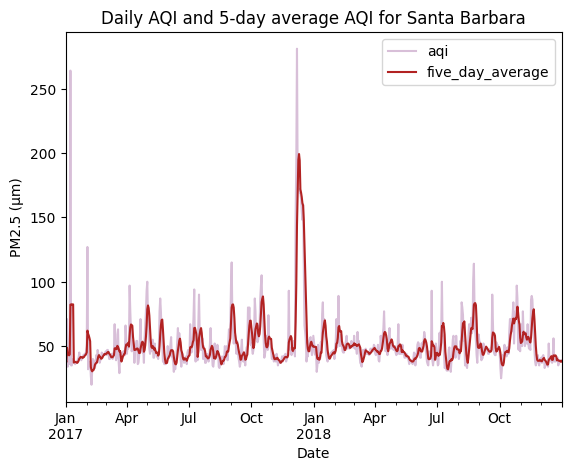

In [3]:
# import matplotlib for colors
import matplotlib.pyplot as plt 

# define colors for plot
colors = ['thistle','firebrick']

# line plot of daily AQI and the 5-day average 
aqi_sb.plot(y = ['aqi','five_day_average'], # setting y as AQI and 5-day average AQI
           xlabel = "Date", # x-axis label
           ylabel = "PM2.5 (μm)", #y-axis label
           title = "Daily AQI and 5-day average AQI for Santa Barbara", # title 
           color = colors) #setting colors for lines


Yes you can see that there is a spike in daily AQI and 5 day rolling average AQI, during December 2017.

## 11

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.